# Data Scrapping

## Import libraries

In [2]:
!pip install deeplake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.7/590.7 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import deeplake
import os


from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from torchvision import transforms, models
from keras.models import load_model


## Scrapping the data

In [2]:
ds_train = deeplake.load('hub://activeloop/nih-chest-xray-train')
ds_test = deeplake.load('hub://activeloop/nih-chest-xray-test')

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/nih-chest-xray-train



|

hub://activeloop/nih-chest-xray-train loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/nih-chest-xray-test



\

hub://activeloop/nih-chest-xray-test loaded successfully.



In [3]:
ds_train.visualize()

HINT: Please forward the port - 43433 to your local machine, if you are running on the cloud.


In [4]:
ds_train.summary()

 * Serving Flask app 'dataset_visualizer'
 * Debug mode: off
Dataset(path='hub://activeloop/nih-chest-xray-train', read_only=True, tensors=['findings', 'images', 'metadata/follow_up_num', 'metadata/orig_img_h', 'metadata/orig_img_pix_spacing_x', 'metadata/orig_img_pix_spacing_y', 'metadata/orig_img_w', 'metadata/patient_age', 'metadata/patient_gender', 'metadata/patient_id', 'metadata/view_position'])

             tensor                  htype              shape             dtype  compression
             -------                -------            -------           -------  ------- 
            findings              class_label        (86524, 1:9)        uint32    None   
             images                  image     (86524, 1024, 1024, 1:4)   uint8     png   
     metadata/follow_up_num         generic           (86524, 1)          int32    None   
       metadata/orig_img_h          generic           (86524, 1)         uint32    None   
 metadata/orig_img_pix_spacing_x    generic   

In [5]:
ds_test.summary()

Dataset(path='hub://activeloop/nih-chest-xray-test', read_only=True, tensors=['images', 'findings', 'boxes/bbox', 'boxes/finding', 'metadata/patient_id', 'metadata/patient_age', 'metadata/patient_gender', 'metadata/follow_up_num', 'metadata/view_position', 'metadata/orig_img_w', 'metadata/orig_img_h', 'metadata/orig_img_pix_spacing_x', 'metadata/orig_img_pix_spacing_y'])

             tensor                  htype              shape             dtype  compression
             -------                -------            -------           -------  ------- 
             images                  image     (25596, 1024, 1024, 1:4)   uint8     png   
            findings              class_label        (25596, 1:8)        uint32    None   
           boxes/bbox                bbox          (25596, 0:4, 4)       float32   None   
          boxes/finding           class_label        (25596, 0:4)        uint32    None   
       metadata/patient_id          generic           (25596, 1)          int

In [6]:
ds_train.findings[1].numpy()

array([6, 2], dtype=uint32)

In [7]:
# Indexing
img = ds_train.images[0].numpy()              # Fetch the 1st image and return a NumPy array
label = ds_train.findings[0].numpy(aslist=True) # Fetch the 1st label and store it as a
                                        # as a list

text_labels = ds_train.findings[1].data()['text'] # Fetch the first labels and return them as text

# Slicing
imgs = ds_train.images[0:100].numpy(aslist=True) # Fetch 100 images and return a NumPy array
                                # The method above produces an exception if
                                # the images are not all the same size

labels = ds_train.findings[0:100].numpy(aslist=True) # Fetch 100 labels and store
                                             # them as a list of NumPy arrays

In [8]:
age = ds_train.metadata.patient_age[5].data()['value']
gender = ds_train.metadata.patient_gender[1].data()['text']
position = ds_train.metadata.view_position[1].data()['text']

In [9]:
print('finding is {}'.format(text_labels))
print('age is {}'.format(age))
print('gender is {}'.format(gender))
print('position is {}'.format(position))

finding is ['Cardiomegaly', 'Emphysema']
age is [69]
gender is ['M']
position is ['PA']


# Image Quality Assessment

## Load Model

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# hyperparameters
nc = 3 # number of channels
nf = 64 # number of features to begin with
dropout = 0.2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# setup a resnet block and its forward function
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# setup the final model structure
class XRayClassifier(nn.Module):
    def __init__(self, nc=nc, nf=nf, dropout=dropout):
        super(XRayClassifier, self).__init__()

        self.resnet_blocks = nn.Sequential(
            ResNetBlock(nc,   nf,    stride=2), # (B, C, H, W) -> (B, NF, H/2, W/2), i.e., (64,64,128,128)
            ResNetBlock(nf,   nf*2,  stride=2), # (64,128,64,64)
            ResNetBlock(nf*2, nf*4,  stride=2), # (64,256,32,32)
            ResNetBlock(nf*4, nf*8,  stride=2), # (64,512,16,16)
            ResNetBlock(nf*8, nf*16, stride=2), # (64,1024,8,8)
        )

        self.classifier = nn.Sequential(
            nn.Conv2d(nf*16, 1, 8, 1, 0, bias=False),
            nn.Dropout(p=dropout),
            nn.Sigmoid(),
        )

    def forward(self, input):
        output = self.resnet_blocks(input.to(device))
        output = self.classifier(output)
        return output

In [11]:
model = XRayClassifier()
model.to(device)
model.eval()

XRayClassifier(
  (resnet_blocks): Sequential(
    (0): ResNetBlock(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResNetBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, mom

In [12]:
model.resnet_blocks[-1]

ResNetBlock(
  (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential(
    (0): Conv2d(512, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

## Adding Backward and Forward Hook

In [13]:
# defines two global scope variables to store our gradients and activations
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
  global gradients # refers to the variable in the global scope
  print('Backward hook running...')
  gradients = grad_output
  # In this case, we expect it to be torch.Size([batch size, 1024, 8, 8])
  print(f'Gradients size: {gradients[0].size()}')
  # We need the 0 index because the tensor containing the gradients comes
  # inside a one element tuple.

def forward_hook(module, args, output):
  global activations # refers to the variable in the global scope
  print('Forward hook running...')
  activations = output
  # In this case, we expect it to be torch.Size([batch size, 1024, 8, 8])
  print(f'Activations size: {activations.size()}')

In [14]:
backward_hook = model.resnet_blocks[-1].register_full_backward_hook(backward_hook, prepend=False)
forward_hook = model.resnet_blocks[-1].register_forward_hook(forward_hook, prepend=False)

## Finding Gradient and Activation

In [15]:
from PIL import Image
import numpy as np

rand = np.random.randint(0, 100)  # Random number between 0 and 100

# Convert Array to Image
image = Image.fromarray(img[rand]).convert('RGB')
image.show()

In [16]:
from torchvision import transforms
from torchvision.transforms import ToTensor

image_size = 256
transform = transforms.Compose([
                               transforms.Resize(image_size, antialias=True),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])

img_tensor = transform(image) # stores the tensor that represents the image

In [17]:
model(img_tensor.unsqueeze(0)).backward()

Forward hook running...
Activations size: torch.Size([1, 1024, 8, 8])
Backward hook running...
Gradients size: torch.Size([1, 1024, 8, 8])


## Computing Grad-CAM

In [18]:
# pool the gradients across the channels
pooled_gradients = torch.mean(gradients[0], dim=[0, 2, 3])

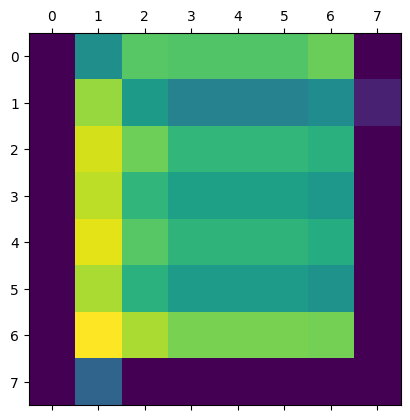

In [19]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

# weight the channels by corresponding gradients
for i in range(activations.size()[1]):
  activations[:, i, : :] *= pooled_gradients[i]

# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
heatmap = F.relu(heatmap)

# normalize the heatmap
heatmap /= torch.max(heatmap)

# Move the heatmap to the CPU and convert it to a NumPy array
heatmap_cpu = heatmap.cpu().detach().numpy()

# draw the heatmap
plt.matshow(heatmap_cpu)

## Combining Heatmap and Image

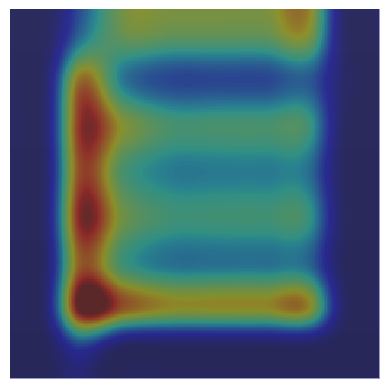

In [20]:
from torchvision.transforms.functional import to_pil_image
from matplotlib import colormaps
import numpy as np
import PIL

# Plot image
fig, ax = plt.subplots()
ax.axis('off')

# Convert img_tensor to a PIL image and get its size
img_pil = to_pil_image(img_tensor, mode='RGB')
width, height = img_pil.size

# Plot original image
ax.imshow(to_pil_image(img_tensor, mode='RGB'))

# Resize heatmap and overlay
overlay = to_pil_image(heatmap.detach(), mode='F').resize((width, height),
                                                          resample=PIL.Image.BICUBIC)

# Apply colormap
cmap = colormaps['jet']
overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)

# Plot the heatmap on the same axes
ax.imshow(overlay, alpha=0.4,
          interpolation='nearest', extent=[0, width, height, 0])

# Show the plot
plt.show()